# Actividad 1 - Análisis de ventas de videojuegos



This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Lista de videojuegos con más de 100.000 ventas generada por vgchartz.com.

La descripción de atributos:

        - Rank: Ranking of overall sales
        - Name: The games name
        - Platform: Platform of the games release (i.e. PC,PS4, etc.)
        - Year: Year of the game's release
        - Genre: Genre of the game
        - Publisher: Publisher of the game
        - NA_Sales: Sales in North America (in millions)
        - EU_Sales: Sales in Europe (in millions)
        - JP_Sales: Sales in Japan (in millions)
        - Other_Sales: Sales in the rest of the world (in millions)
        - Global_Sales: Total worldwide sales.


1. Descarga y abre el .csv en data-sets de modo que el Rank sea el índice. Muestra la cabeza del dataframe y también la cola.
2. Calcula la dimensión y los data types, comprueba que son correctos.
3. Cuenta el número de categorías únicas en las columnas con tipo de datos `object`.
4. Haz una descripción de los valores con `describe`. Usa el comando `include=all` para obtener también la descripción de los atributos categóricos.
5. ¿Tiene valores faltantes? Calcula las proporciones de los mismos por columnas. Introduce los valores faltantes como la media en el caso de variables numéricas y  moda en el de categóricas.
7. Crea una columna que represente el porcentaje de ventas en Europa respecto a la global y calcula su media, haz que la columna sólo tenga dos cifras decimales.
8. Extrae las filas del año 1980.
9. Extra las filas del juego 'Wii Sports' (hay variaos nombres diferentes)
10. Extrae las filas correspondientes a los videojuegos con ventas globales superiores a 10 y  entre el año 1990 y 2000 (incluídos)
11. ¿Qué plataforma tiene más ventas globales? ¿Y en cada país? Saca la suma, la media, el máximo y el mínimo del agrupamiento. La tabla debe estar ordenado por la media de las ventas globales. Muestra sólo las 5 de mayores ventas.
12. Los 10 videojuegos de estrategia más populares de 2011 en NA.
13. Crea una tabla pivotal que de los máximos de las ventas globales respecto a plataforma y género. Debe incluir valores marginales. Debe estar ordenada descendientemente respecto al máximo de cada plataforma.
14. Crea una tabla de frecuencias que cuente dentro de cada género y plataforma el número de juegos que entraron en cada bin de la partición por cuartiles de las ventas globales usando 0.1,0.25,0.5,0.75,0.9 y `pd.qcut`

15. Realiza un gráfico de barras de la cantidad de ventas respecto al género en los distintos mercados: NA, EU, JP y Other. ¿Qué observas? ¿ Qué mercados tienen gustos de consumo parecidos?

16. Realiza una gráfica de serie temporal en la que aparezcan las ventas de cada mercado desde sus orígenes. ¿Son semejantes las series temporales? ¿ Qué puntos de cambio de tendencias observas?
***

Problema avanzado:

**Agrupa respecto a géneros y plataformas hazlo. ¿Qué tres plataformas tienen mayor media de ventas globales en cada género? Haz una tabla que las muestre.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./vgsales.csv', index_col='Rank', na_values='nan')
print (df.columns)
df.head(3)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [3]:
df.tail(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
df.shape

(16598, 10)

In [5]:
df.isnull().sum() / df.shape[0]

Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [6]:
df.Name.unique().shape

(11493,)

In [98]:
# ¿ Qué porcentaje de ventas de tiene el juego Wii Sports en el mercado europeo en el año 2006 ?
# Opciones de la pregunta
# a.	12.98 %
# b.	35.07 %
# c.	60.3 %
# d.	8.9 %

cond1 = (df.Year==2006)
cond2 = (df.Name.str.contains('Wii Sports'))
df.loc[cond1 & cond2].EU_Sales.sum() / df.loc[cond1 & cond2].Global_Sales.sum() * 100

35.07372492144066

In [92]:
df.loc[(df.Year==2006) & (df.Name.str.contains('Wii Sports'))].NA_Sales.sum() / df.loc[(df.Year==2006)].NA_Sales.sum() * 100

15.768470659775009

In [93]:
df.loc[(df.Year==2006) & (df.Name.str.contains('Wii Sports'))].JP_Sales.sum() / df.loc[(df.Year==2006)].JP_Sales.sum() * 100

5.11325105113251

In [94]:
df.loc[(df.Year==2006) & (df.Name.str.contains('Wii Sports'))].Other_Sales.sum() / df.loc[(df.Year==2006)].Other_Sales.sum() * 100

15.542899136505604

In [95]:
df.loc[(df.Year==2006) & (df.Name.str.contains('Wii Sports'))].Global_Sales.sum() / df.loc[(df.Year==2006)].Global_Sales.sum() * 100

15.879778903730998

In [8]:
df.loc[df.Name.str.contains('Wii Sports')].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4854,Wii Sports Club,WiiU,2014.0,Sports,Nintendo,0.19,0.14,0.04,0.03,0.40


In [9]:
df.loc[df.Year==1980].groupby('Publisher')['Name'].count()

Publisher
Activision    5
Atari         4
Name: Name, dtype: int64

In [10]:
np.sort(df.Year.unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [11]:
df.loc[df.Year.isna()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [12]:
# Pokemon Red/Pokemon Blue es el juego con mayor éxito de ventas en Japón entre 
# los años 1990 y 2000 entre los videojuegos que consiguieron ventas globales superiores a 10.

df.loc[(df.Year.between(1990, 2000)) & (df.Global_Sales>10)].sort_values('JP_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89


In [13]:
# ¿Qué plataforma tiene más ventas globales a lo largo del tiempo?
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [14]:
# ¿ Cuáles son los 3 videojuegos de estrategia más populares en Norte América (NA) en el año 2011 ?

df.loc[(df.Year==2011) & (df.Genre=='Strategy')].sort_values('NA_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1208,LEGO Battles: Ninjago,DS,2011.0,Strategy,Warner Bros. Interactive Entertainment,1.07,0.36,0.00,0.12,1.55
1716,Plants vs. Zombies,DS,2011.0,Strategy,Mastertronic,0.95,0.15,0.00,0.08,1.18
4926,Combat of Giants: Dinosaurs 3D,3DS,2011.0,Strategy,Ubisoft,0.25,0.06,0.05,0.03,0.39
5399,Tom Clancy's Ghost Recon: Shadow Wars,3DS,2011.0,Strategy,Ubisoft,0.22,0.09,0.00,0.03,0.34
3400,Total War: Shogun 2,PC,2011.0,Strategy,Sega,0.19,0.31,0.00,0.09,0.59
7821,Plants vs. Zombies,PS3,2011.0,Strategy,PopCap Games,0.18,0.00,0.00,0.01,0.19
6343,Tropico 4,PC,2011.0,Strategy,Kalypso Media,0.10,0.13,0.00,0.04,0.27
7375,Yu-Gi-Oh! 5D's World Championship 2011: Over t...,DS,2011.0,Strategy,Konami Digital Entertainment,0.10,0.03,0.07,0.01,0.21
10535,Dora & Kai-Lan's Pet Shelter,DS,2011.0,Strategy,Take-Two Interactive,0.08,0.01,0.00,0.01,0.10


In [15]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
#¿ Cuáles son los 2 puntos de ruptura del comportamiento de la serie de ventas globales 
# en los diferentes territorios a los ojos de la gráfica de la serie temporal?

#Realiza una gráfica de serie temporal en la que aparezcan las ventas de cada mercado desde sus orígenes.
# ¿Son semejantes las series temporales? ¿ Qué puntos de cambio de tendencias observas?

temp = df.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
temp.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

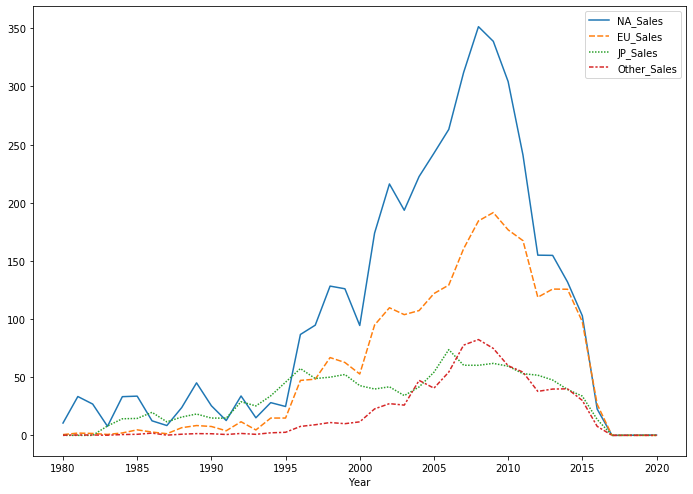

In [30]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, data=temp)

# sns.lineplot(data=temp)

In [31]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [70]:
# Realiza un gráfico de barras de la cantidad de ventas respecto al género en los distintos mercados:
# NA, EU, JP y Other. ¿Qué observas? ¿ Qué mercados tienen gustos de consumo parecidos?

temp = df.groupby('Genre', as_index=False)['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
temp = pd.melt(temp, id_vars="Genre", var_name="region", value_name="sales")
temp = temp.sort_values(['region', 'Genre'])
temp.head()

,Genre,region,sales
12,Action,EU_Sales,525.00
13,Adventure,EU_Sales,64.13
14,Fighting,EU_Sales,101.32
15,Misc,EU_Sales,215.98
16,Platform,EU_Sales,201.63


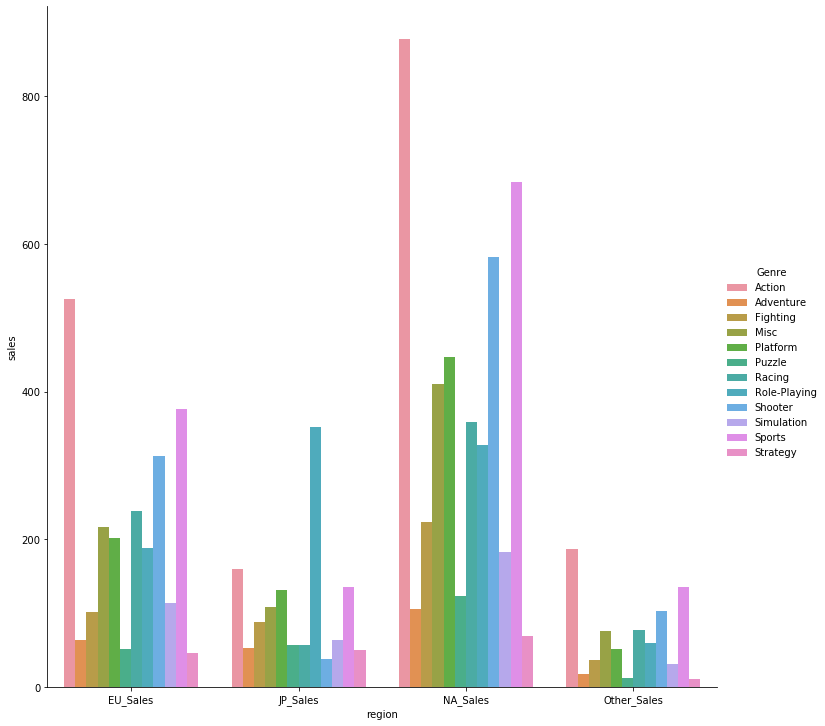

In [71]:
sns.catplot(x='region', y='sales', hue='Genre', data=temp,
            kind='bar', height=10)

In [72]:
temp.head()

,Genre,region,sales
12,Action,EU_Sales,525.00
13,Adventure,EU_Sales,64.13
14,Fighting,EU_Sales,101.32
15,Misc,EU_Sales,215.98
16,Platform,EU_Sales,201.63


In [77]:
percent = []
for reg in temp.region.unique():
    total = temp.loc[temp.region==reg]['sales'].sum()
    for gen in temp.Genre.unique():
        percent.append(temp.loc[(temp.region==reg) & (temp.Genre==gen)]['sales'].sum() / total*100)
        
temp['p_sales_region'] = percent

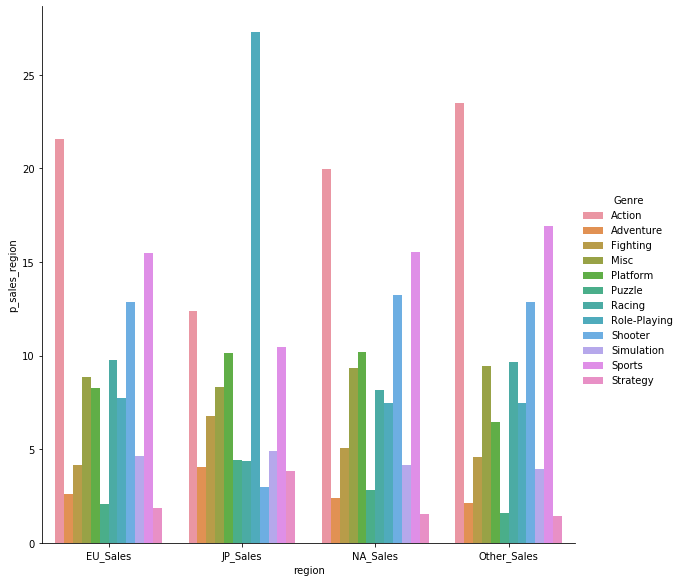

In [89]:
sns.catplot(x='region', y='p_sales_region', hue='Genre', data=temp,
            kind='bar', height=8)

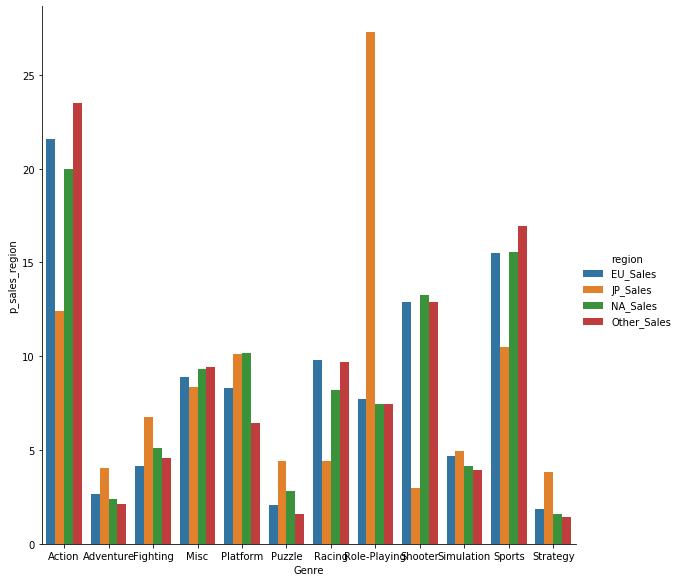

In [88]:
sns.catplot(x='Genre', y='p_sales_region', hue='region', data=temp,
            kind='bar', height=8)

In [83]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [86]:
df.NA_Sales.sum() / df.Global_Sales.sum() *100

49.245889216227006